In [1]:
import pandas as pd
import os
import re
import missingno as msno

import math
import scipy.stats as st

#import tiktoken

In [2]:
os.chdir('C:\\Users\\corne\\Downloads\\archive (11)')
os.getcwd()

'C:\\Users\\corne\\Downloads\\archive (11)'

<h2><br></h2>
<h2>Importing data</h2>

In [3]:
df = pd.read_csv('interactions_train.csv')
df

,user_id,recipe_id,date,rating,u,i
0,2046,4684,2000-02-25,5.0,22095,44367
1,2046,517,2000-02-25,5.0,22095,87844
2,1773,7435,2000-03-13,5.0,24732,138181
3,1773,278,2000-03-13,4.0,24732,93054
4,2046,3431,2000-04-07,5.0,22095,101723
...,...,...,...,...,...,...
698896,926904,457971,2018-12-18,5.0,13681,141067
698897,2002312797,27208,2018-12-18,5.0,14897,99787
698898,1290903,131607,2018-12-18,5.0,11605,76163
698899,226867,363072,2018-12-18,5.0,3604,29101


,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8
...,...,...,...,...,...,...,...,...,...,...,...,...
231632,zydeco soup,486161,60,227978,2012-08-29,"['ham', '60-minutes-or-less', 'time-to-make', ...","[415.2, 26.0, 34.0, 26.0, 44.0, 21.0, 15.0]",7,"['heat oil in a 4-quart dutch oven', 'add cele...",this is a delicious soup that i originally fou...,"['celery', 'onion', 'green sweet pepper', 'gar...",22
231633,zydeco spice mix,493372,5,1500678,2013-01-09,"['15-minutes-or-less', 'time-to-make', 'course...","[14.8, 0.0, 2.0, 58.0, 1.0, 0.0, 1.0]",1,['mix all ingredients together thoroughly'],this spice mix will make your taste buds dance!,"['paprika', 'salt', 'garlic powder', 'onion po...",13
231634,zydeco ya ya deviled eggs,308080,40,37779,2008-06-07,"['60-minutes-or-less', 'time-to-make', 'course...","[59.2, 6.0, 2.0, 3.0, 6.0, 5.0, 0.0]",7,"['in a bowl , combine the mashed yolks and may...","deviled eggs, cajun-style","['hard-cooked eggs', 'mayonnaise', 'dijon must...",8
231635,cookies by design cookies on a stick,298512,29,506822,2008-04-15,"['30-minutes-or-less', 'time-to-make', 'course...","[188.0, 11.0, 57.0, 11.0, 7.0, 21.0, 9.0]",9,['place melted butter in a large mixing bowl a...,"i've heard of the 'cookies by design' company,...","['butter', 'eagle brand condensed milk', 'ligh...",10


In [5]:
ratings = pd.read_csv('RAW_interactions.csv')
ratings

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."
...,...,...,...,...,...
1132362,116593,72730,2003-12-09,0,Another approach is to start making sauce with...
1132363,583662,386618,2009-09-29,5,These were so delicious! My husband and I tru...
1132364,157126,78003,2008-06-23,5,WOW! Sometimes I don't take the time to rate ...
1132365,53932,78003,2009-01-11,4,Very good! I used regular port as well. The ...


In [6]:
users = pd.read_csv('PP_users.csv')
users

,u,techniques,items,n_items,ratings,n_ratings
0,0,"[8, 0, 0, 5, 6, 0, 0, 1, 0, 9, 1, 0, 0, 0, 1, ...","[1118, 27680, 32541, 137353, 16428, 28815, 658...",31,"[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 4.0, 4.0, ...",31
1,1,"[11, 0, 0, 2, 12, 0, 0, 0, 0, 14, 5, 0, 0, 0, ...","[122140, 77036, 156817, 76957, 68818, 155600, ...",39,"[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...",39
2,2,"[13, 0, 0, 7, 5, 0, 1, 2, 1, 11, 0, 1, 0, 0, 1...","[168054, 87218, 35731, 1, 20475, 9039, 124834,...",27,"[3.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 5.0, ...",27
3,3,"[498, 13, 4, 218, 376, 3, 2, 33, 16, 591, 10, ...","[163193, 156352, 102888, 19914, 169438, 55772,...",1513,"[5.0, 5.0, 5.0, 5.0, 4.0, 4.0, 5.0, 5.0, 5.0, ...",1513
4,4,"[161, 1, 1, 86, 93, 0, 0, 11, 2, 141, 0, 16, 0...","[72857, 38652, 160427, 55772, 119999, 141777, ...",376,"[5.0, 5.0, 5.0, 5.0, 4.0, 4.0, 5.0, 4.0, 5.0, ...",376
...,...,...,...,...,...,...
25071,25071,"[1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[144172, 154054]",2,"[5.0, 5.0]",2
25072,25072,"[1, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[162436, 148228]",2,"[5.0, 5.0]",2
25073,25073,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[162681, 172034]",2,"[5.0, 5.0]",2
25074,25074,"[2, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[157808, 159896]",2,"[5.0, 5.0]",2


In [7]:
recipes = pd.read_csv('PP_recipes.csv')
recipes

,id,i,name_tokens,ingredient_tokens,steps_tokens,techniques,calorie_level,ingredient_ids
0,424415,23,"[40480, 37229, 2911, 1019, 249, 6878, 6878, 28...","[[2911, 1019, 249, 6878], [1353], [6953], [153...","[40480, 40482, 21662, 481, 6878, 500, 246, 161...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[389, 7655, 6270, 1527, 3406]"
1,146223,96900,"[40480, 18376, 7056, 246, 1531, 2032, 40481]","[[17918], [25916], [2507, 6444], [8467, 1179],...","[40480, 40482, 729, 2525, 10906, 485, 43, 8393...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[2683, 4969, 800, 5298, 840, 2499, 6632, 7022,..."
2,312329,120056,"[40480, 21044, 16954, 8294, 556, 10837, 40481]","[[5867, 24176], [1353], [6953], [1301, 11332],...","[40480, 40482, 8240, 481, 24176, 296, 1353, 66...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...",1,"[1257, 7655, 6270, 590, 5024, 1119, 4883, 6696..."
3,74301,168258,"[40480, 10025, 31156, 40481]","[[1270, 1645, 28447], [21601], [27952, 29471, ...","[40480, 40482, 5539, 21601, 1073, 903, 2324, 4...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,"[7940, 3609, 7060, 6265, 1170, 6654, 5003, 3561]"
4,76272,109030,"[40480, 17841, 252, 782, 2373, 1641, 2373, 252...","[[1430, 11434], [1430, 17027], [1615, 23, 695,...","[40480, 40482, 14046, 1430, 11434, 488, 17027,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[3484, 6324, 7594, 243]"
...,...,...,...,...,...,...,...,...
178260,323143,76862,"[40480, 6444, 1964, 9369, 486, 569, 17551, 40481]","[[8780], [11835, 1762, 4465, 31494], [6812], [...","[40480, 40482, 729, 2525, 715, 485, 26641, 404...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,"[840, 208, 2499, 2683, 1925, 335, 1511]"
178261,149114,145962,"[40480, 17027, 24715, 974, 11877, 40481]","[[6812], [5940], [30645, 4785, 6821], [6953], ...","[40480, 40482, 729, 2525, 10906, 485, 43, 8393...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,"[2499, 4717, 1168, 6270, 6324, 7040]"
178262,34200,65066,"[40480, 12187, 11434, 1738, 2627, 40481]","[[6167, 20930, 510], [1353], [15022, 6953], [6...","[40480, 40482, 500, 246, 1719, 5024, 240, 2366...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",2,"[2378, 7655, 3219, 2320, 5168, 5319, 4189, 268..."
178263,30618,77358,"[40480, 870, 488, 1325, 519, 2220, 2417, 488, ...","[[12395, 38308, 40118], [3137, 15022], [30878,...","[40480, 40482, 562, 481, 10734, 240, 23667, 58...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[5627, 2807, 5412, 3399, 7979, 1093, 1257, 780..."


In [8]:
#merge ratings andd recipes 
df = recipes.merge(ratings, how='inner',left_on='id',right_on='recipe_id')

<Axes: >

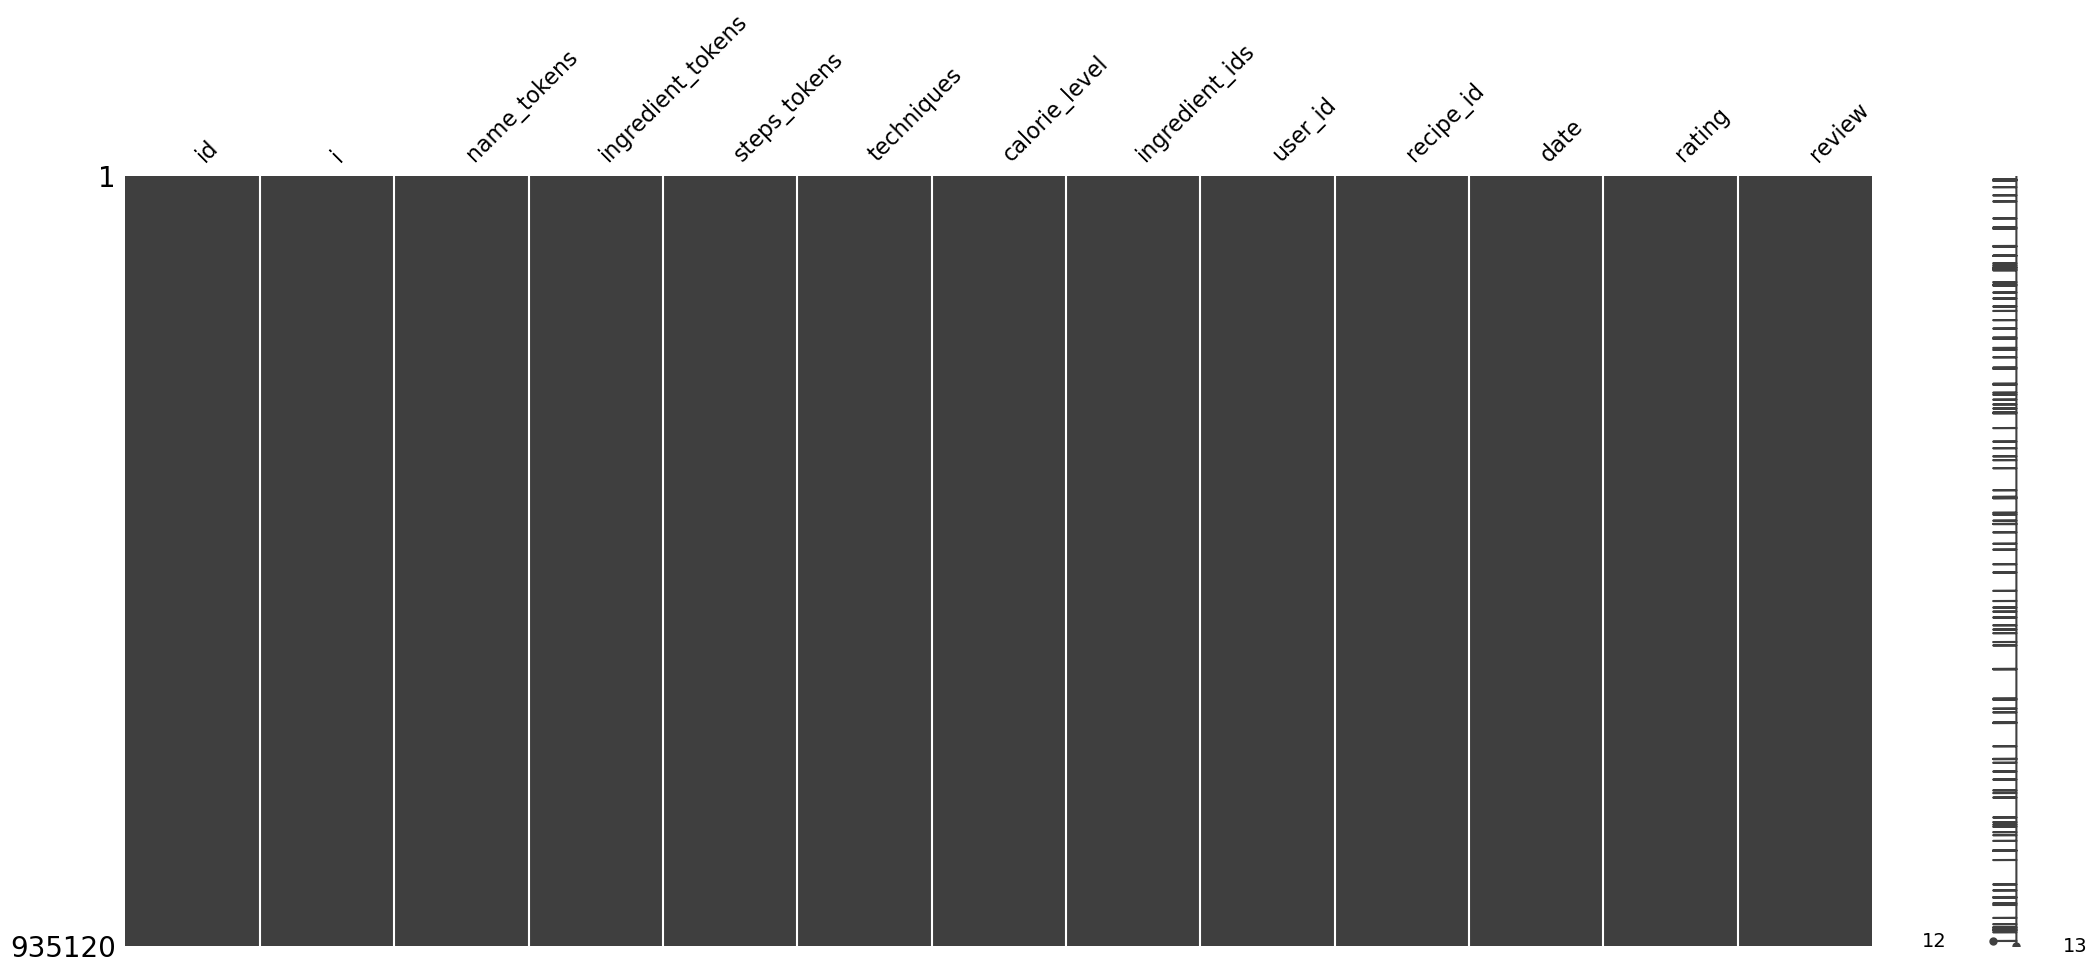

In [9]:
msno.matrix(df)

In [10]:
'''
#Check encodings
enc = [l for l in recipes['name_tokens'][0] if l != '[' if l != ']' if l != ',']
enc = ''.join(enc).strip().split()
enc = [int(l) for l in enc]
print(enc)

enc = tiktoken.encoding_for_model("gpt-4")
words = enc.encode('cat VIBES are the best vibes!')
print(words)

#enc.decode(enc)
'''

'\n#Check encodings\nenc = [l for l in recipes[\'name_tokens\'][0] if l != \'[\' if l != \']\' if l != \',\']\nenc = \'\'.join(enc).strip().split()\nenc = [int(l) for l in enc]\nprint(enc)\n\nenc = tiktoken.encoding_for_model("gpt-4")\nwords = enc.encode(\'cat VIBES are the best vibes!\')\nprint(words)\n\n#enc.decode(enc)\n'

<h2><br></h2>
<h2>Cleaning data</h2>

Bayesian rating from [2](https://medium.com/tech-that-works/wilson-lower-bound-score-and-bayesian-approximation-for-k-star-scale-rating-to-rate-products-c67ec6e30060#:~:text=Lower%20bound%20of%20Wilson%20score,and%20then%20use%20this%20scor)

In [11]:
'''
def get_unique_rankings(df):
    unique_recipes = df.groupby('recipe_id').agg('size')
    index_start = 0
    score = []
    for row in unique_recipes:
        index_stop = index_start + row
        n = (df[index_start:index_stop]['rating']).tolist()
        index_start = index_stop
        score.append(bayesian_rating_products(n))
    return pd.Series(score)
'''

"\ndef get_unique_rankings(df):\n    unique_recipes = df.groupby('recipe_id').agg('size')\n    index_start = 0\n    score = []\n    for row in unique_recipes:\n        index_stop = index_start + row\n        n = (df[index_start:index_stop]['rating']).tolist()\n        index_start = index_stop\n        score.append(bayesian_rating_products(n))\n    return pd.Series(score)\n"

In [12]:
#https://medium.com/tech-that-works/wilson-lower-bound-score-and-bayesian-approximation-for-k-star-scale-rating-to-rate-products-c67ec6e30060#:~:text=Lower%20bound%20of%20Wilson%20score,and%20then%20use%20this%20score.

def bayesian_rating(n, confidence=0.95):
    """
    Function to calculate wilson score for N star rating system. 
    :param n: Array having count of star ratings where ith index represent the votes for that category i.e. [3, 5, 6, 7, 10]
    here, there are 3 votes for 1-star rating, similarly 5 votes for 2-star rating. 
    :param confidence: Confidence interval
    :return: Score
    """
    n = n.tolist()
    if sum(n)==0:
        return 0
    K = len(n)
    z = st.norm.ppf(1 - (1 - confidence) / 2)
    N = sum(n)
    first_part = 0.0
    second_part = 0.0
    for k, n_k in enumerate(n):
        first_part += (k+1)*(n[k]+1)/(N+K)
        second_part += (k+1)*(k+1)*(n[k]+1)/(N+K)
    score = first_part - z * math.sqrt((second_part - first_part*first_part)/(N+K+1))
    return score

In [13]:
#delete unused features
def delete_unused(df):
    try:
        del df['date']
        del df['id']
        del df['i']
        del df['name_tokens']
        del df['review']
        del df['user_id']
        return df
    except:
        return df

#scale ratings
def scale_ratings(df):
    _df = df.groupby('recipe_id').agg({'rating':bayesian_rating})
    _df.columns = _df.columns.get_level_values(0)
    _df = _df.reset_index()
    df = _df.merge(df,how='left',on='recipe_id')
    try:
        del df['rating_y']
    except:
        pass
    df.rename(columns={'rating_x':{'rating'}})
    df = df.drop_duplicates(subset='recipe_id')
    return df.set_index('recipe_id')

In [14]:
#convert strings of embeddings to integer lists
def convertStrings(s):
    ingredients = re.findall('\[.*?\]',s)
    words = [list(map(int,re.findall('\d+',word))) for word in ingredients]
    return words

def replaceStringEnc(df):
    df['ingredient_tokens'] = df['ingredient_tokens'].apply(convertStrings)
    df['steps_tokens'] = df['steps_tokens'].apply(convertStrings)
    df['techniques'] = df['techniques'].apply(convertStrings)
    return df


In [15]:
df = delete_unused(df)
df = scale_ratings(df)
df = replaceStringEnc(df)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178265 entries, 38 to 537716
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   rating_x           178265 non-null  float64
 1   ingredient_tokens  178265 non-null  object 
 2   steps_tokens       178265 non-null  object 
 3   techniques         178265 non-null  object 
 4   calorie_level      178265 non-null  int64  
 5   ingredient_ids     178265 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ MB


In [ ]:
#combine all text of a column into one list

In [ ]:
'''
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

X_tfidf = vectorizer.fit_transform(data).toarray()
'''

<h2><br></h2>
<h2>Clustering</h2>

In [ ]:
from sklearn.decomposition import TruncatedSVD

pca = TruncatedSVD(n_components=100,random_state=10)

X_pca = pca.fit_transform(ingredients)
X_pca

array([[ 0.95957161,  0.13966315, -0.17289729, ...,  0.08252429,
        -0.01157686,  0.067182  ],
       [ 1.20153333,  0.06681964,  0.92231456, ..., -0.02767168,
         0.18334908,  0.01568211],
       [ 1.88253956, -0.19427936,  0.54703288, ..., -0.14582634,
        -0.09206151,  0.29132736],
       ...,
       [ 1.94541149, -0.35208765, -0.14114677, ..., -0.03564626,
         0.11812465, -0.24378962],
       [ 0.92279169,  1.78561524,  0.4827282 , ...,  0.36584985,
        -0.23325091,  0.13375026],
       [ 0.76492369,  1.89280015,  0.17505761, ..., -0.12101908,
        -0.23862568, -0.12461651]])

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2).fit_transform(X_pca)
kmeans

c:\Users\corne\anaconda3\envs\python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


AttributeError: 'NoneType' object has no attribute 'split'

In [ ]:
import seaborn as sns

sns.scatterplot(data=kmeans)

<h2><br</h2>>
<h2>Wors referenced</h2>
1. Li, Shuyang. "Food.com Recipes and Interactions" [Data set]. Kaggle. https://doi.org/10.34740/KAGGLE/DSV/783630.
2. Kumar, A. "Wilson Lower bounc Score and Bayesian Approximation for K star scale rating to Rate products." Medium, 2020. https://medium.com/tech-that-works/wilson-lower-bound-score-and-bayesian-approximation-for-k-star-scale-rating-to-rate-products-c67ec6e30060#:~:text=Lower%20bound%20of%20Wilson%20score,and%20then%20use%20this%20score.